<a href="https://colab.research.google.com/github/AndrewsJascoro/DataAnalyts_Mintic_Talento_Tech/blob/main/SQL_and_SQLite_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import of libraries

import pandas as pd # python library for data manipulation
import sqlite3 # SQLite

# The input data is available in the "../input/" directory.

path = "/content/database.sqlite"

# "C:\Users\Usuario\Downloads\database.sqlite"
database = path + 'database.sqlite'

# We create the connection with the DB and we will list the tables we have

conn = sqlite3.connect(database)
print ("Success connection")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

Success connection


,type,name,tbl_name,rootpage,sql


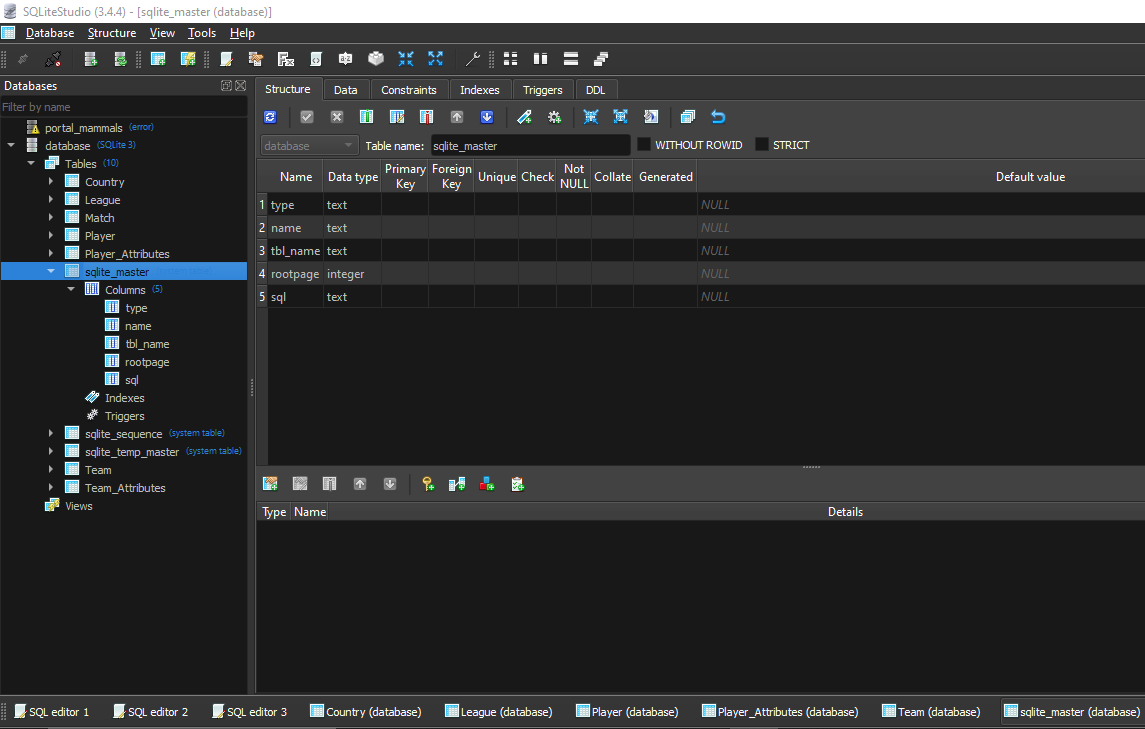

In [8]:
 # Improts
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
from IPython.display import display

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Connect to an SQLite database file.
conn = sqlite3.connect('/content/database.sqlite')

# Create a cursor object to execute SQL commands:
cursor = conn.cursor()

# Execute the SQL query to select all data from the 'Country' table:
cursor.execute('''Select * From Country; ''')

# Fetch all rows returned by the query into a DataFrame:
# countries = pd.DataFrame(cursor.fetchall(),
# columns=[i[0] for i in cursor.description])
countries = pd.DataFrame(cursor.fetchall(),
                         columns=[i[0] for i in cursor.description])
display(countries)

conn.commit()
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [10]:
# Imports
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Read data from the 'Country' table directly into a DataFrame
countries = pd.read_sql_query("SELECT * FROM Country", conn)

# Display the DataFrame
display(countries)

# Close the connection
conn.close()


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


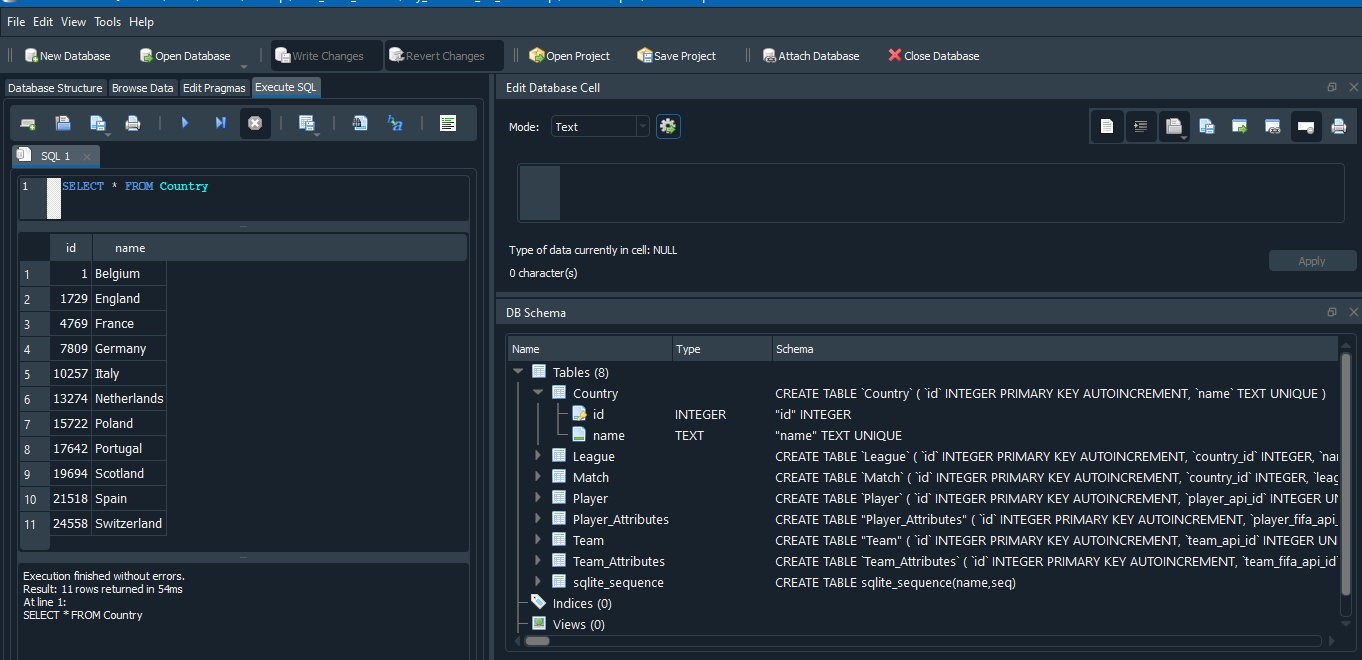

In [11]:
# Import the necessary libraries
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')  # '/content/database.sqlite'
# '/content/database.sqlite'
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to count the occurrences of each preferred foot
cursor.execute("SELECT preferred_foot, COUNT(*) AS count FROM Player_Attributes GROUP BY preferred_foot")

# Fetch all rows returned by the query
results = cursor.fetchall()

# Display the results
for row in results:
    #display(f"{row[0]}-handed players: {row[1]}")
    print(f"{row[0]}-handed players: {row[1]}")

display(results)

# Close the connection
conn.close()

None-handed players: 836
left-handed players: 44733
right-handed players: 138409


[(None, 836), ('left', 44733), ('right', 138409)]

In [12]:
# Import the necessary libraries
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
# '/content/database.sqlite'
conn = sqlite3.connect('/content/database.sqlite')

# Read data from the 'Player_Attributes' table into a DataFrame
query = "SELECT preferred_foot FROM Player_Attributes"
player_data = pd.read_sql_query(query, conn)

# Count the occurrences of each preferred foot
foot_counts = player_data['preferred_foot'].value_counts()

# Display the results
for foot, count in foot_counts.items():
    print(f"{foot}-handed players: {count}", "\n")

display(foot_counts)
# Close the connection
conn.close()

right-handed players: 138409 

left-handed players: 44733 



right    138409
left      44733
Name: preferred_foot, dtype: int64

In [14]:
# Count the occurrences of each preferred foot, including missing values
foot_counts = player_data['preferred_foot'].value_counts(dropna=False)
display(foot_counts)

right    138409
left      44733
None        836
Name: preferred_foot, dtype: int64

In [ ]:
conn.commit()
conn.close()

In [ ]:
# Import required libraries
import sqlite3
import pandas as pd
import zipfile
import os

# Path to the SQLite database file
db_file_path = "/content/database.sqlite.zip"

# Specify the extraction directory
extracted_folder_path = "/content/extracted_folder"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(db_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Connect to the SQLite database
conn = sqlite3.connect(os.path.join(extracted_folder_path, 'database.sqlite'))

# Query data into DataFrame
df_Country = pd.read_sql_query("SELECT * FROM Country", conn)

# Display the DataFrame
print(df_Country.head())

# Close the database connection
conn.close()
